# Dependencies and Importing Dataset

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [176]:
df = pd.read_csv(r'datasets/zameen-updated.csv')
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


# Data Cleaning

In [177]:
df.info() # 'agency and 'agent' contains null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [178]:
df.describe() #'agency' and 'agent' columns have null values

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [179]:
df[df['price'] == 1]['property_id'].count() # 7 properties with price as 1
df[df['price'] == 0]['property_id'].count() # 3 properties with price as 0 



3

In [180]:
df['price'].sort_values(axis=0,ascending=True).head(5000).unique() # some unusual prices to note

array([    0,     1,     3,     4,     5,     6,     8,    44,    54,
        1000,  1800,  3000,  4000,  4500,  5000,  5500,  6000,  6500,
        7000,  7500,  7600,  8000,  8500,  9000,  9500, 10000, 10500,
       11000, 11500, 12000, 12350, 12500, 13000, 13500, 14000, 14500,
       15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000,
       19500, 20000], dtype=int64)

In [181]:
df[df['Area Size'] == 0]['property_type'].count() # 12 properties with area size 0

12

In [182]:
df[(df['baths'] == 0) & (df['bedrooms'] == 0)]
# 13% of properties have no bedrooms or baths 

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
12,1623818,3300,https://www.zameen.com/Property/f_6_f_6_2_hous...,House,400000000,F-6,Islamabad,Islamabad Capital,33.731532,73.065696,0,4.5 Kanal,For Sale,0,07-04-2019,NaN,NaN,Kanal,4.5,1-5 Kanal
19,2384979,424,https://www.zameen.com/Property/islamabad_pwd_...,Flat,1750000,PWD Housing Scheme,Islamabad,Islamabad Capital,33.570792,73.145256,0,1.5 Marla,For Sale,0,06-13-2019,Paris Real Estate & Builders,Chaudhary Naveed,Marla,1.5,0-5 Marla
47,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan,Kanal,6.0,5-10 Kanal
60,1646880,1781,https://www.zameen.com/Property/bahria_town_se...,House,18500000,Bahria Town,Lahore,Punjab,31.381706,74.195294,0,10 Marla,For Sale,0,07-04-2019,Punjab Associates,Ch. Tariq Ali Ranjha,Marla,10.0,5-10 Marla
83,3051476,373,https://www.zameen.com/Property/lahore_valenci...,House,65000000,Valencia Housing Society,Lahore,Punjab,31.405370,74.257078,0,2 Kanal,For Sale,0,06-02-2019,Punjaab Estates,Irfan Rehman Khan,Kanal,2.0,1-5 Kanal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168366,17355428,1052,https://www.zameen.com/Property/lahore_bankers...,House,12900000,Bankers Co-operative Housing Society,Lahore,Punjab,31.450522,74.394553,0,5 Marla,For Sale,0,07-18-2019,M Ahmad Associates,Rizwan Saeed,Marla,5.0,0-5 Marla
168383,17356216,3961,https://www.zameen.com/Property/johar_town_joh...,Lower Portion,28000,Johar Town,Lahore,Punjab,31.469082,74.266148,0,5 Marla,For Sale,0,07-18-2019,NaN,NaN,Marla,5.0,0-5 Marla
168393,17354543,478,https://www.zameen.com/Property/rawalpindi_adi...,House,6000000,Adiala Road,Rawalpindi,Punjab,33.550869,73.056182,0,5 Marla,For Sale,0,07-18-2019,Adeel Real Estate & Builders,Adeel Shahzad Sheikh,Marla,5.0,0-5 Marla
168402,17355396,478,https://www.zameen.com/Property/rawalpindi_adi...,House,13000000,Adiala Road,Rawalpindi,Punjab,33.550869,73.056182,0,10 Marla,For Sale,0,07-18-2019,Umar Real Estate Builders,UMER,Marla,10.0,5-10 Marla


In [183]:
houses = df.copy()
houses['date_added'] = pd.to_datetime(houses['date_added'])

#replacing null values
houses[['agent', 'agency']] = houses[['agent', 'agency']].fillna('None')


#removing unecessary columns
houses.drop(['property_id','location_id','page_url'],axis=1,inplace=True)

#removing 12 properties with 0 area size
houses = houses[houses['Area Size'] != 0]

#removing properties with unrealistic prices
houses = houses[houses['price'] >= 1000]

#There are only 4 or 5 cities, no need for sepeprate province column
houses.drop(['province_name'],axis=1,inplace=True)

# dropping this columns as there's already a area categorical column with subgroups
houses.drop(['area'],axis=1,inplace=True)

In [184]:
#dropping date added column (time period of dataset is about a year, and price wouldn't have affected considerably in that time)
#also time series forecasting is NOT relevant for this task
houses.drop(['date_added'],axis=1,inplace=True)

# Analysis

In [185]:
# Separating numerical columns
numerical_cols = houses.select_dtypes(include=['number']).columns

# Separating categorical columns
categorical_cols = houses.select_dtypes(include=['object', 'category']).columns

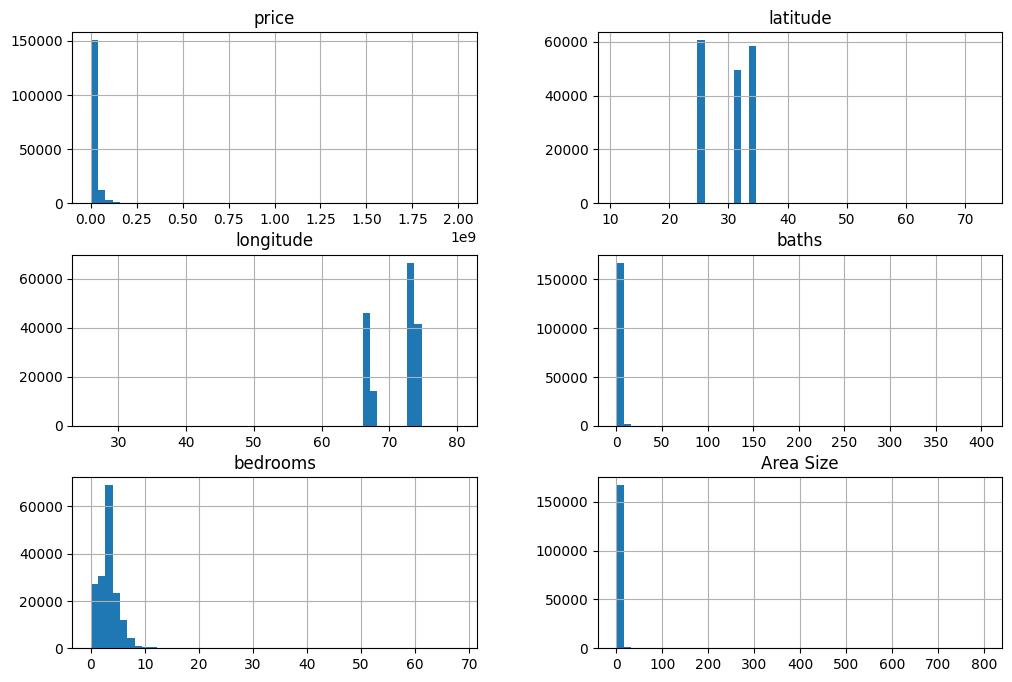

In [186]:
#Distribution of the numerical columns

houses.hist(bins=50, figsize=(12, 8))
plt.show()

<Axes: >

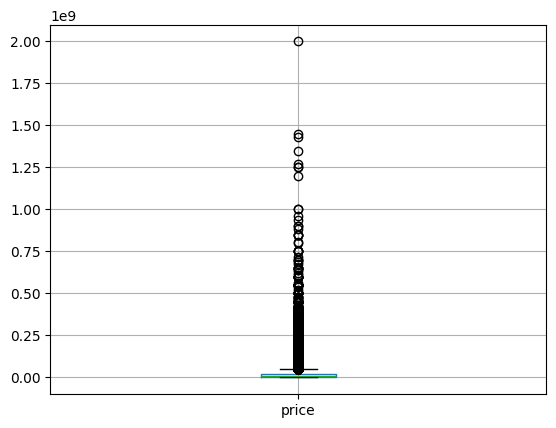

In [187]:
houses.boxplot(column=['price']) # large outlier prices 

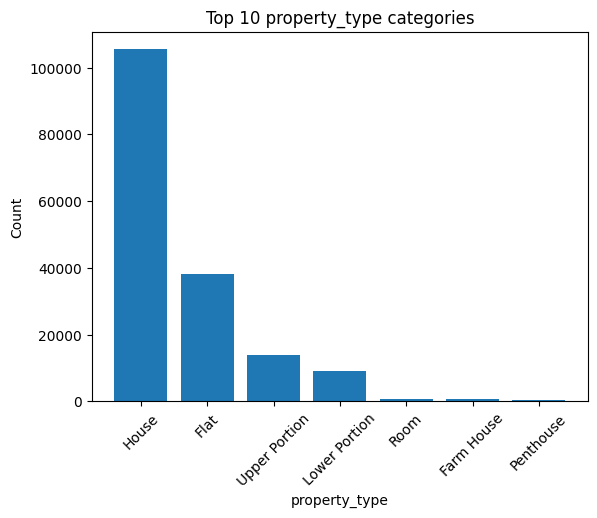

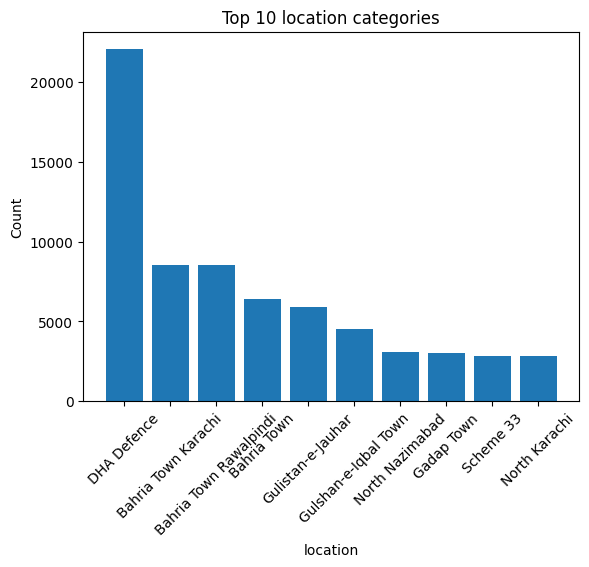

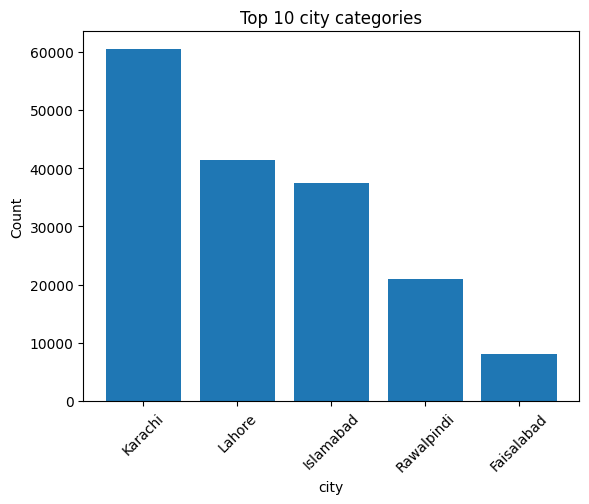

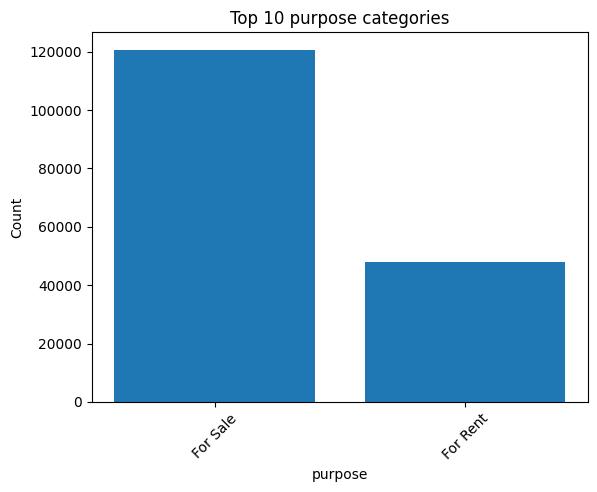

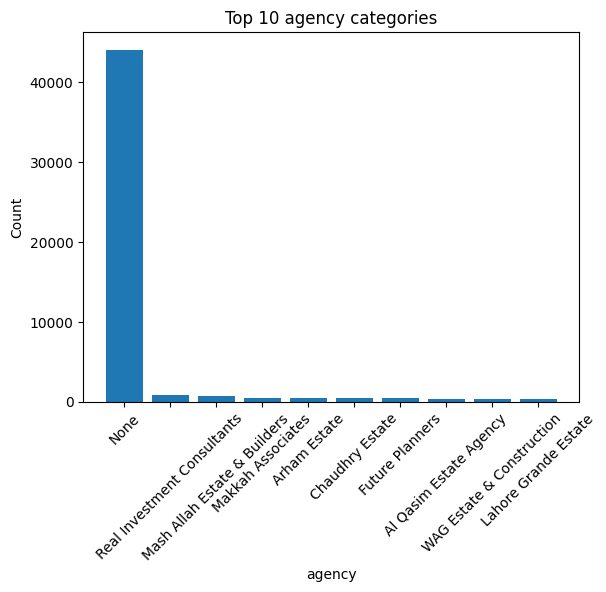

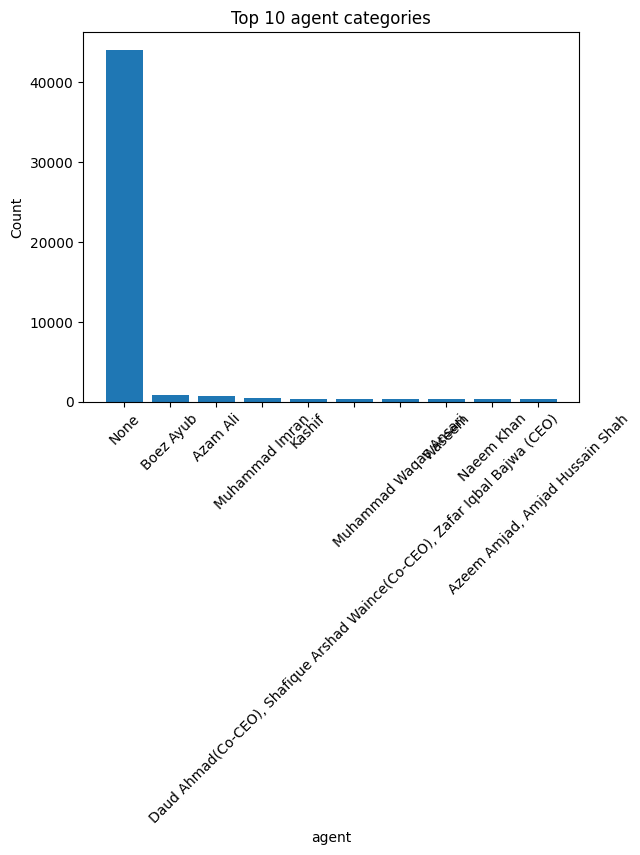

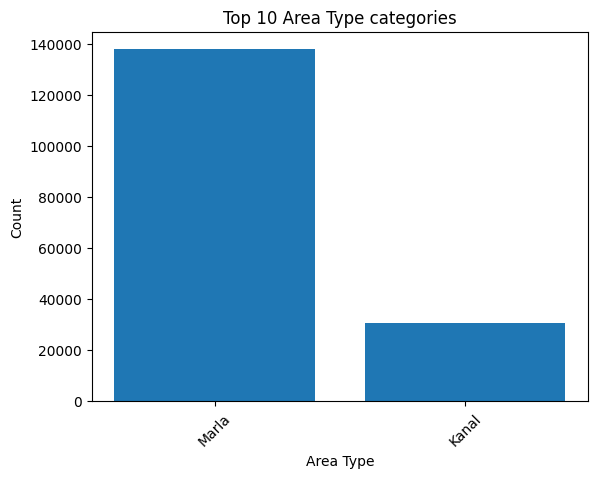

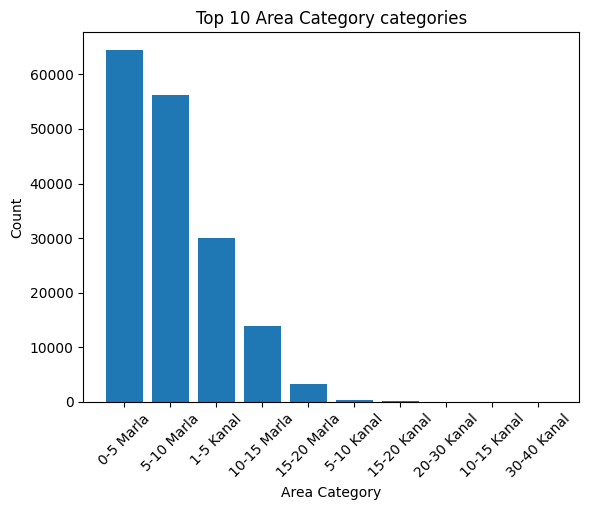

In [188]:
for cat in categorical_cols:
    # Get the top 10 categories and their counts
    top_10 = houses[cat].value_counts().head(10)
    
    
    # Create the bar plot
    plt.bar(top_10.index, top_10.values)
    
    # Add labels and titles for better visualization
    plt.xlabel(cat)
    plt.ylabel('Count')
    plt.title(f'Top 10 {cat} categories')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    
    # Show the plot
    plt.show()

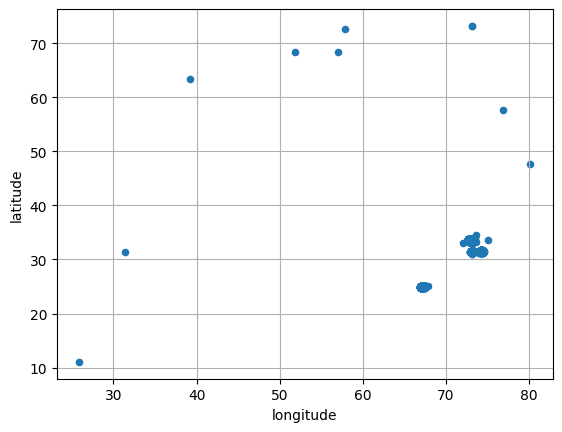

In [189]:
#Plotting geographically not useful as areas are spread sparsely

houses.plot(kind="scatter", x="longitude", y="latitude",grid=True)
plt.show()

<Axes: xlabel='agency'>

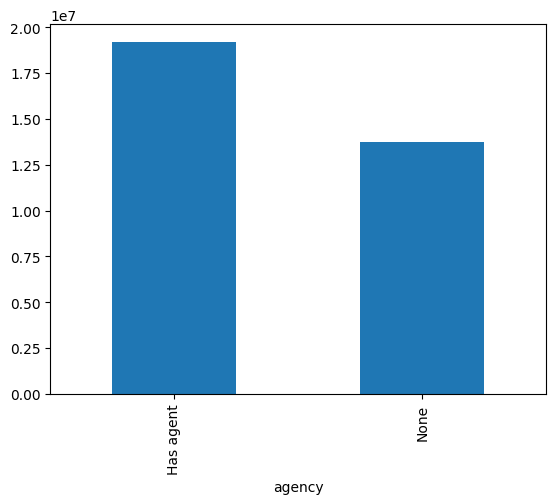

In [190]:
#Simplifying to 1 agency columns with two categories
houses.loc[houses['agency'] != 'None', 'agency'] = 'Has agent'
houses.drop(['agent'],axis=1,inplace=True)

houses.groupby(by=['agency'])['price'].mean().plot(kind='bar') #comparing average price of properties with agents vs no agents




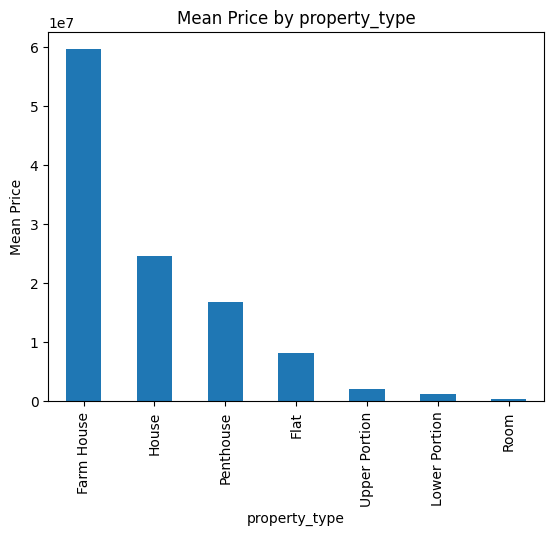

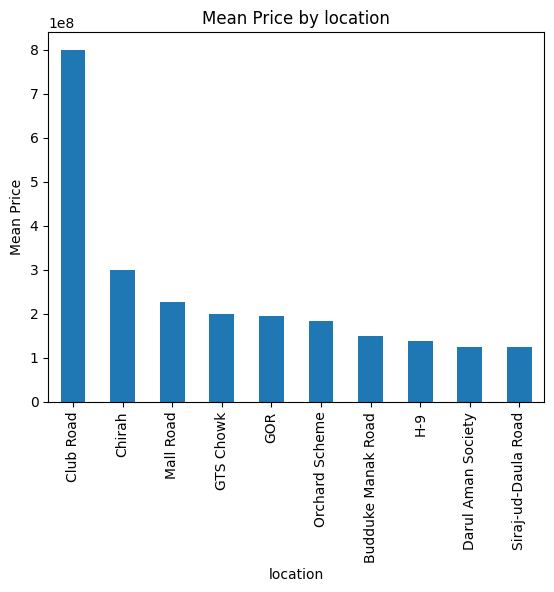

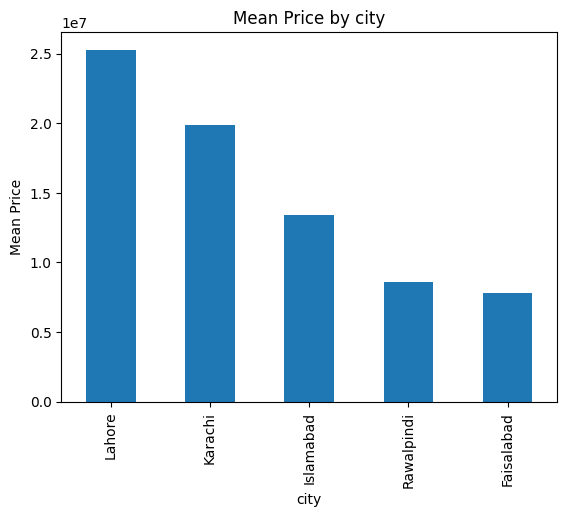

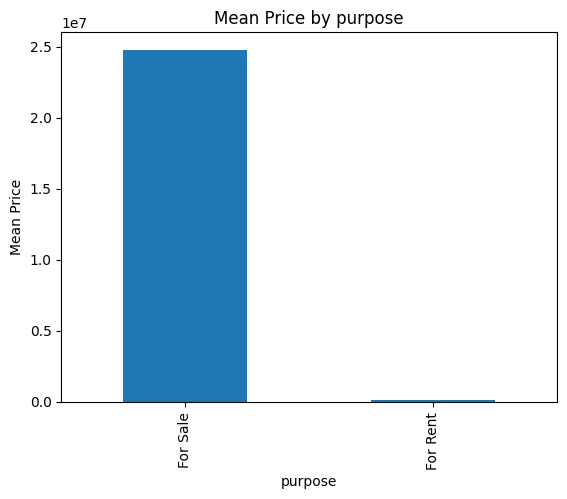

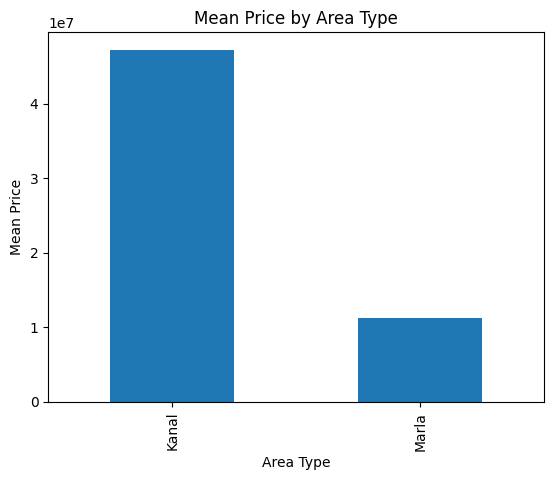

In [191]:
# Doing same as above for some other categorical columns
for col in ['property_type', 'location', 'city', 'purpose', 'Area Type']:
    
    mean_prices = houses.groupby(by=[col])['price'].mean().sort_values(ascending=False).head(10)

    # Plot the results
    mean_prices.plot(kind='bar')

    # Add a title and labels
    plt.title(f'Mean Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Price')

    # Show the plot for each column
    plt.show()


In [192]:
houses.drop(['location'],axis=1,inplace=True)  #removing due to extremely high cardinality

# Feature Engineering

In [193]:
df_replica = houses.copy()

In [194]:
def feature_eng(df,rem_outliers = False):
    df = df.copy()
    
    # Removing features not relevant for modeling 
    df.drop(['latitude', 'longitude'], axis=1, inplace=True)
    
    # Combining all area columns into one single feature in marlas (1 kanal = 20 marlas)
    conditions = [(df['Area Type'] == "Marla"), (df['Area Type'] == "Kanal")]
    choices = [df['Area Size'], df['Area Size'] * 20]
    df['Area(Marlas)'] = np.select(conditions, choices)
    df.drop(['Area Type', 'Area Size', 'Area Category'], inplace=True, axis=1)
    
    # Combining upper and lower into just 'portion' as they are in a similar category
    df.loc[(df['property_type'] == "Lower Portion") | (df['property_type'] == "Upper Portion"), 'property_type'] = "Portion"
    
    # Uniforming categories with low instances as 'Other'
    
    df.loc[df['property_type'].isin(['Room', 'Farm House', 'Penthouse']), 'property_type'] = "Other"
    
    if rem_outliers == True:
        #capping outlier values 
        lower_limit = df['price'].quantile(0.05)  # 5th percentile
        upper_limit = df['price'].quantile(0.95)  # 95th percentile

        # Cap the outliers in the 'price' column
        df['price'] = df['price'].clip(lower=lower_limit, upper=upper_limit)
        
    
    
    df['rooms_per_marla'] = (df['bedrooms'] + df['baths']) / df['Area(Marlas)']

    


    
    
    return df

In [195]:
houses_final = feature_eng(df_replica,True)

In [196]:
import os
import pickle

#

# Define the path to the datasets folder
datasets_folder = 'datasets'
os.makedirs(datasets_folder, exist_ok=True)

# Define the path to the pickle file
pickle_file_path = os.path.join(datasets_folder, 'houses_final.pkl')

# Save the DataFrame as a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(houses_final, file)

print(f'DataFrame saved as pickle file at: {pickle_file_path}')


DataFrame saved as pickle file at: datasets\houses_final.pkl


# Outlier Analysis

In [209]:
def get_outliers(df, column,outlier):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if outlier==True:
        return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    else:
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


outlier = feature_eng(df_replica,False)

In [210]:
# Example on the price column:

price_outlier = get_outliers(outlier, 'price',True)
not_outlier = get_outliers(outlier,'price',False)

In [211]:
price_outlier.describe()

,price,baths,bedrooms,Area(Marlas),rooms_per_marla
count,1.354700e+04,13547.000000,13547.000000,13547.000000,13547.000000
mean,1.015220e+08,4.508304,4.973500,33.771787,0.470259
std,7.989749e+07,2.868183,2.266555,132.830400,1.200288
min,4.850000e+07,0.000000,0.000000,0.100000,0.000000
25%,5.800000e+07,3.000000,5.000000,20.000000,0.275000
50%,7.500000e+07,5.000000,5.000000,20.000000,0.500000
75%,1.150000e+08,6.000000,6.000000,30.000000,0.600000
max,2.000000e+09,13.000000,27.000000,8320.000000,120.000000


In [212]:
not_outlier.describe()

,price,baths,bedrooms,Area(Marlas),rooms_per_marla
count,1.548680e+05,154868.000000,154868.000000,154868.000000,154868.000000
mean,1.044205e+07,2.731236,3.022497,10.031693,0.851655
std,1.141978e+07,2.371868,1.862945,85.400703,0.750582
min,1.000000e+03,0.000000,0.000000,0.100000,0.000000
25%,1.150000e+05,0.000000,2.000000,4.800000,0.430108
50%,7.200000e+06,3.000000,3.000000,6.700000,0.789474
75%,1.550000e+07,4.000000,4.000000,10.000000,1.176471
max,4.820000e+07,403.000000,68.000000,16000.000000,110.000000


#### Outliers are on average bigger, more amount of bedrooms and baths

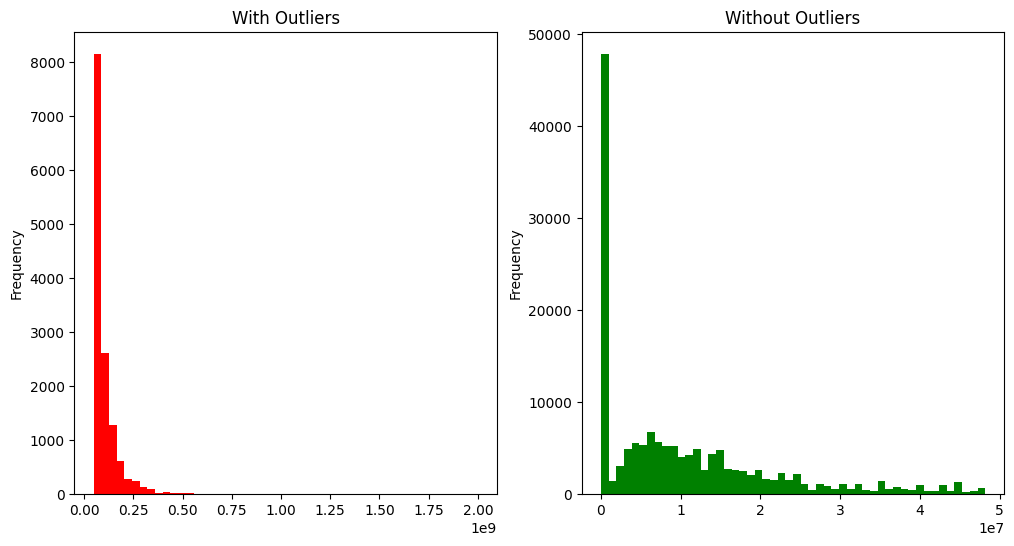

In [214]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
price_outlier['price'].plot(kind='hist', bins=50, color='red', title='With Outliers')
plt.subplot(1, 2, 2)
not_outlier['price'].plot(kind='hist', bins=50, color='green', title='Without Outliers')
plt.show()


#### Outlier houses have a much bigger spread of price range

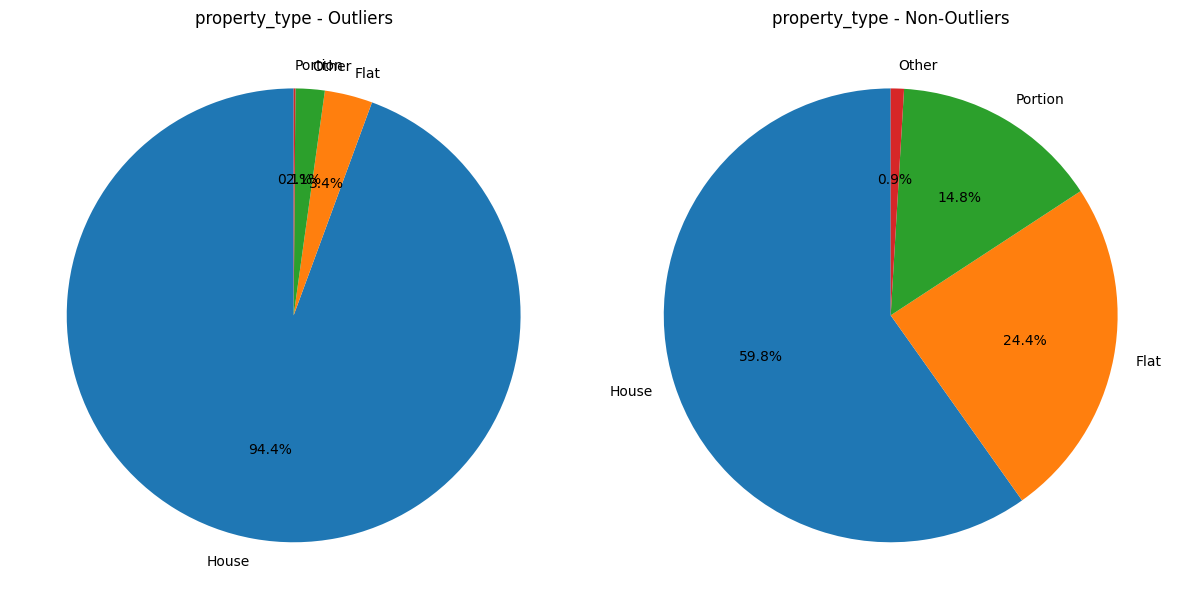

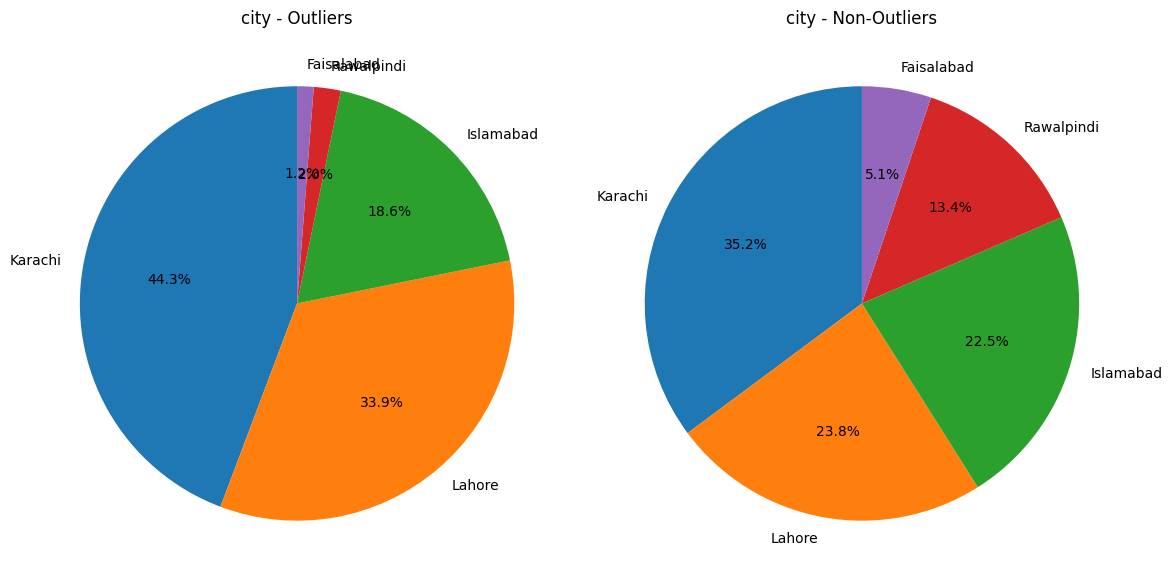

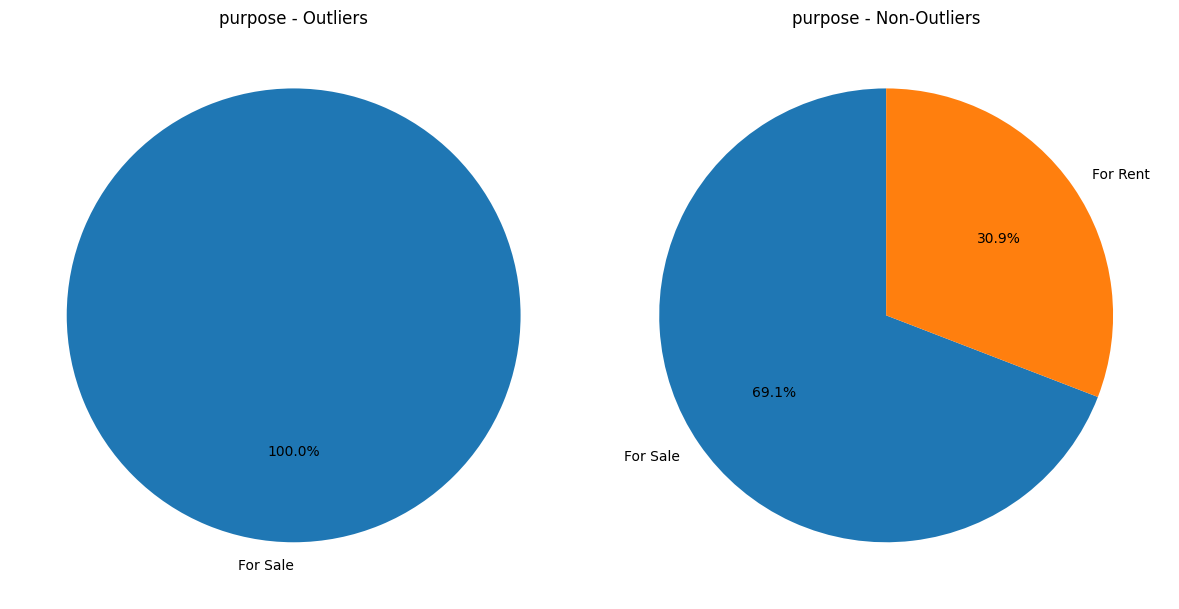

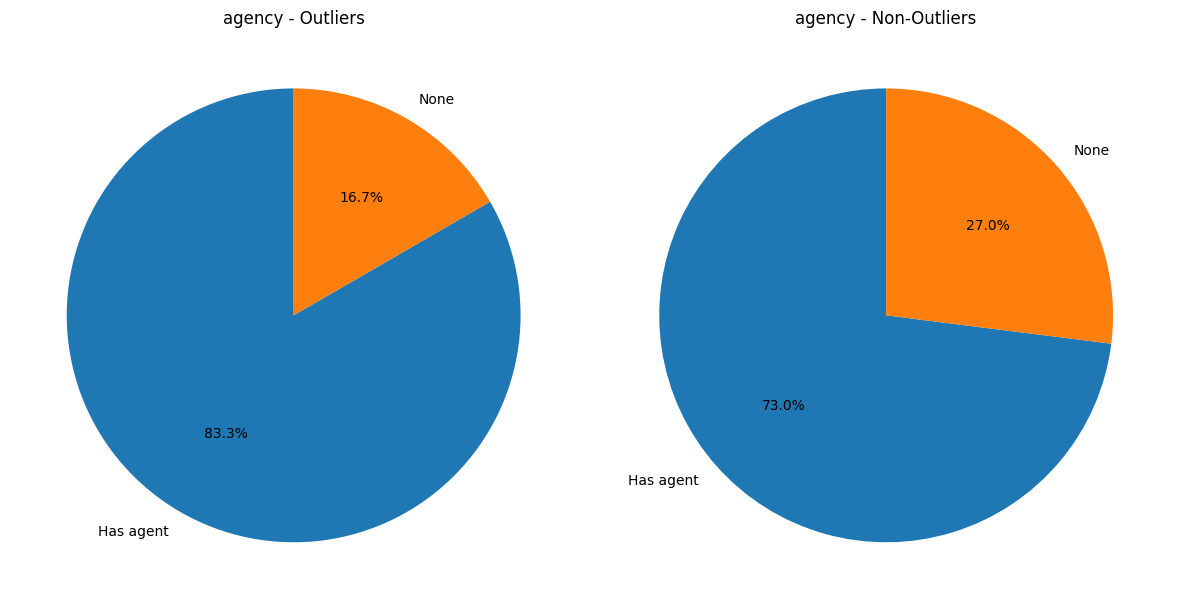

In [220]:
import matplotlib.pyplot as plt

catcols = ['property_type', 'city', 'purpose', 'agency']  

for col in catcols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

    # Outliers dataset pie chart
    outliers_counts = price_outlier[col].value_counts(normalize=True) * 100
    axes[0].pie(outliers_counts, labels=outliers_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0].set_title(f'{col} - Outliers')

    # Non-Outliers dataset pie chart
    non_outliers_counts = not_outlier[col].value_counts(normalize=True) * 100
    axes[1].pie(non_outliers_counts, labels=non_outliers_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'{col} - Non-Outliers')

    # Display the plots
    plt.tight_layout()
    plt.show()


#### Difference in share of values in various categories 